# Map of hospitals in Victoria using Python

There are 325 hospitals in victoria. We will visualize them in the map such that some insights can be extracted.

## Purpose of this post:
- Mark all the hospitals in victoria using folium marker
- Which localities have the highest number of hospitals? - barplot 
- Visualizing localities with the highest number of hospitals in a map using folium Circle.

## What is used?
- Pandas - to read, filter and merge the data.
- seaborn to plot Barplot.
- Python's folium- Marker, Circle and Heatmap. Folium is specifically used to visualize maps.

## Data Reference:
1. Hospital locations by vic.gov.in - [here](https://discover.data.vic.gov.au/dataset/hospital-locations-spatial) .
2. Postcode details provided by  Matthew Procter - [here](https://www.matthewproctor.com/australian_postcodes) .


## Links :
- Check out the corresponding [blog post here](). 
- Check out [Youtube video for the interactive map and its use cases](). 
- Check out the [Interactive Map application here]().

## 1. Import dependencies

In [414]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the data
Hospital location data is provided by vic.gov.au [here](https://discover.data.vic.gov.au/dataset/hospital-locations-spatial)

In [415]:
data = pd.read_csv('./data/hospital_locations.csv')
data.head()


,X,Y,FID,LabelName,OpsName,Type,StreetNum,RoadName,RoadType,RoadSuffix,CampusCode,LGAName,LocalityNa,Postcode,VicgovRegi,State,ServiceNam
0,144.983399,-37.809681,1,East Melbourne Specialist Day Hospital,EAST MELBOURNE DAY HOSPITAL,PRIVATE,23,CLARENDON,STREET,,8280,MELBOURNE,,3002,NWMR,VIC,
1,145.149300,-37.951400,2,Windsor Avenue Day Surgery,WINDSOR AVENUE DAY SURGERY,PRIVATE,17,WINDSOR,AVENUE,,7050,GREATER DANDENONG,,3171,SMR,VIC,
2,145.344653,-38.034580,3,Hyperbaric Health Wound Centre Berwick,HYPERBARIC HEALTH - BERWICK,PRIVATE,3,GIBB,STREET,,7100,CASEY,,3806,SMR,VIC,
3,143.832286,-37.540553,4,Ballarat Day Procedure Centre,BALLARAT DAY PROCEDURE CENTRE,PRIVATE,1117-1123,HOWITT,STREET,,8430,BALLARAT,,3355,Gram,VIC,
4,145.143379,-38.148189,5,Bayside Day Procedure and Specialist Centre,BAYSIDE DAY PROCEDURE CENTRE,PRIVATE,141,CRANBOURNE,ROAD,,7310,FRANKSTON,,3199,SMR,VIC,


## 3. Exploring the data

What are the number of public and private hospitals in Victoria?

In [416]:
print("Number of public hospitals in victoria :" ,len(data[data["Type"] == "PUBLIC"]))
print("Number of private hospitals in victoria :" ,len(data[data["Type"] == "PRIVATE"]))

Number of public hospitals in victoria : 150
Number of private hospitals in victoria : 175


Fields in the data:

In [417]:
data.columns

Index(['X', 'Y', 'FID', 'LabelName', 'OpsName', 'Type', 'StreetNum',
       'RoadName', 'RoadType', 'RoadSuffix', 'CampusCode', 'LGAName',
       'LocalityNa', 'Postcode', 'VicgovRegi', 'State', 'ServiceNam'],
      dtype='object')

We do not require all the fields in the data, so let us **filter** it

In [418]:
df = data.filter(["Y","X","LabelName","Type","StreetNum","RoadName","RoadType","Postcode"])
df.head()

,Y,X,LabelName,Type,StreetNum,RoadName,RoadType,Postcode
0,-37.809681,144.983399,East Melbourne Specialist Day Hospital,PRIVATE,23,CLARENDON,STREET,3002
1,-37.951400,145.149300,Windsor Avenue Day Surgery,PRIVATE,17,WINDSOR,AVENUE,3171
2,-38.034580,145.344653,Hyperbaric Health Wound Centre Berwick,PRIVATE,3,GIBB,STREET,3806
3,-37.540553,143.832286,Ballarat Day Procedure Centre,PRIVATE,1117-1123,HOWITT,STREET,3355
4,-38.148189,145.143379,Bayside Day Procedure and Specialist Centre,PRIVATE,141,CRANBOURNE,ROAD,3199


# 4. Mark all the hospitals in Victoria in a map using folium Marker

We will use folium marker to mark all (325) the hospitals in Victoria.

In [451]:
#Create a map
m = folium.Map(location=[-37.0,144], control_scale=True, zoom_start=7,attr = "text some")
df_copy = df.copy()

# loop through data to create Marker for each hospital
for i in range(0,len(df_copy)):
    
    # html to be displayed in the popup 
    html="""
    <h4> Hospital name: </h4>""" + str(df_copy.iloc[i]['LabelName'])+ \
    """<h4>Type:</h4>""" + str(df_copy.iloc[i]['Type']) +" Hospital" +\
    """<h4>Address:</h4>""" + str(df_copy.iloc[i]['StreetNum'])+" "+ str(df_copy.iloc[i]['RoadName'])+" "+ str(df_copy.iloc[i]['RoadType'])
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=200, height=300)
    popup = folium.Popup(iframe, max_width=2650)
    
    #If you do not want html in popup this would be the alternative code ->
    #popup = html("<b>HOSPITAL NAME:</b> "+str(df_copy.iloc[i]['LabelName'])+"<br/><br/><b>TYPE:</b> "+str(df_copy.iloc[i]['Type']) +" hospital"\
   # +"<br/><br/> <b>ADDRESS:</B> " + str(df_copy.iloc[i]['StreetNum'])+" "+ str(df_copy.iloc[i]['RoadName'])+" "+ str(df_copy.iloc[i]['RoadType'])),
    
    folium.Marker(
    location=[df_copy.iloc[i]['Y'], df_copy.iloc[i]['X']],
    popup=popup,
    tooltip=str(df_copy.iloc[i]['LabelName']),
    icon=folium.Icon(color='green',icon='medkit',prefix="fa"),
    ).add_to(m)
        
m.save("./files/hospitals.html")
m


- Custom icons can also be created using folium.features.CustomIcon
- In the dataframe, Y is latitude and X is longitude
- IFrame is a way you can use HTML in a popup since popup doesn't have HTML facility by default

folium.Marker arguments - 
- tooltip - adds hover functionality
- popup - string to be displayed when clicked upon the marker. We display more details here such as hospital type and address.
- icon - icon can be selected from font awesome, just mention the prefix 'fa'.


## 5. Postcodes with highest number of hospitals


In [425]:
df_postcode = data.groupby(['Postcode'],as_index=False)
postcode_count = df_postcode.count().filter(["Postcode","FID"])
postcode_count = postcode_count.sort_values(by="FID",ascending=False)
postcode_count

,Postcode,FID
2,3002,10
5,3011,8
82,3199,7
178,3806,7
19,3052,6
...,...,...
93,3260,1
94,3264,1
95,3268,1
97,3284,1


- Note that FID field here just indicates the count of hospitals for a given postcode

## 6. Merge this with postcode details
- The original dataframe does not contain postcode details such as locality name, latitude, and longitude based on a given postcode.
- Postcode details are obtained from [here](https://www.matthewproctor.com/australian_postcodes) by Matthew Procter.
- both the dataframes are merged based on the common key - postcode.

In [428]:
australian_postcodes = pd.read_csv('./data/australian_postcodes.csv')
vic_postcodes = australian_postcodes[australian_postcodes["state"]=='VIC']
vic_postcodes = vic_postcodes.filter(["postcode","locality","lat",'long'])
vic_postcodes.head(5)

,postcode,locality,lat,long
6007,3000,MELBOURNE,-37.817403,144.956776
6008,3001,MELBOURNE,0.000000,0.000000
6009,3002,EAST MELBOURNE,-37.818517,144.982207
6010,3003,WEST MELBOURNE,-37.810871,144.949592
6011,3004,MELBOURNE,-37.844246,144.970161


- Merge - 

In [429]:
df_merged  = postcode_count.merge(vic_postcodes,left_on='Postcode',right_on='postcode',how="inner")
df_merged = df_merged.dropna()
top_localities = df_merged.sort_values(by="FID",ascending=False)
top_localities


,Postcode,FID,postcode,locality,lat,long
0,3002,10,3002,EAST MELBOURNE,-37.818517,144.982207
2,3011,8,3011,SEDDON,-37.807101,144.907953
3,3011,8,3011,SEDDON WEST,-37.807101,144.907953
1,3011,8,3011,FOOTSCRAY,-37.807101,144.907953
4,3199,7,3199,FRANKSTON,-38.162578,145.135961
...,...,...,...,...,...,...
589,3898,1,3898,OMEO VALLEY,147.615721,147.615721
588,3898,1,3898,OMEO,-37.066169,147.464799
587,3898,1,3898,HINNOMUNJIE,-37.066169,147.464799
586,3898,1,3898,GLEN WILLS,-37.066169,147.464799


## 7. Localities with most hospitals

- Note: There can be more than one locality under a single postcode.
- We will find out which localities have the highest number of hospitals

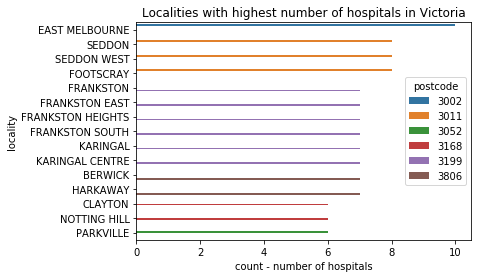

In [458]:
top_localities_15 = top_localities.head(15)
ax = sns.barplot(top_localities_15['FID'],top_localities_15['locality'],hue=top_localities_15['postcode'])
ax.set(xlabel="count - number of hospitals",ylabel="locality",title="Localities with highest number of hospitals in Victoria")
ax

As we can see from the barplot above, The top 5 localities with most number of hospitals are  East melbourne,Seddon and SeddonWest,Footscray and Frankston.

## 8. Map of the number of hospitals in a locality 
- We will use the folium circle to create this map.
- the size of the circle represents the number of hospitals in the locality.

In [445]:
from folium.plugins import HeatMap
from folium.features import CustomIcon
m = folium.Map(location=[-38.0,145], control_scale=True, zoom_start=10,attr = "text some",tiles='cartodbdark_matter')
df_copy = df_merged.copy()
df_copy['count'] = 1

# create Folium circle
for i in range(0,len(df_copy)):
     # html to be displayed in the popup 
    html="""
    <h4> Locality Name: </h4>""" + str(df_copy.iloc[i]['locality'])+\
    """<h4>Postcode:</h4>""" + str(df_copy.iloc[i]['postcode'])+\
    """<h4>Number of hospitals:</h4>""" + str(df_copy.iloc[i]['FID'])
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=200, height=300)
    popup = folium.Popup(iframe, max_width=2650)
    
    folium.Circle(
    location=[df_copy.iloc[i]['lat'], df_copy.iloc[i]['long']],
    radius=float(df_copy.iloc[i]['FID']*200),
    popup=popup,
    tooltip=str(df_copy.iloc[i]['locality']),
    color='crimson',
     fill=True,
     fill_color='green'
    ).add_to(m)
        
m.save("./files/locality.html")


#m.save("highest_hospitals_postcode.html")
m

Disclaimer :
- Also note that the circle is a just a representation for the locality. For accurate hospital locations prefer hospitals view.


## 9. Heatmap of the hospitals


In [448]:
m = folium.Map(location=[-38.0,145], control_scale=True, zoom_start=10,attr = "text some",tiles='cartodbdark_matter')
df_copy = df.copy()
df_copy['count']=1
HeatMap(data=df_copy[['Y', 'X', 'count']].groupby(['Y', 'X']).sum().reset_index().values.tolist(),gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},radius=15, max_zoom=13).add_to(m)
m.save("./files/heatmap.html")
m

- The heatmap indicate the density of the hospitals in the region.

## Use cases:
1. **1st use case** - hospital view -  To check for the location of hospitals in Victoria and its Address, And also the type of hospital, whether it is public or private.
  - Public hospitals usually offer cheaper services. And private hospitals are known for more comfort, you can choose based on your preference.
2. **2nd use case** - real estate based -in locality view- If you are looking for a place to stay in a locality with a high number of hospitals you can make a decision based on this map.
  - for example, if you are deciding between Notting hill and ashwood, you might wanna prefer Notting hill as it has 6 hospitals compare to just 1 in Ashwood
3. **3rd use case** - Travel - using heatmap - Suppose you are traveling outside Melbourne and you need to keep hospitals close by. You might prefer the route that takes you through  ballarat or Bendigo over some other place like Castlemaine.

## Conclusion
We can combine all the three features, i.e hospitals, locality and the heatmap in a single map using Featuregroup and control layer.
If you want to check out the **code for combined features visit my github repository [here]()** and open app.py

**To view the app (combining all three features) [click here]()**.

Also check out my youtube video for [Inteactive maps in victoria]()
